# ECE 842 Project 2
----
- **Name**: Aman Dhruva Thamminana
- **Student ID**: 160555256
- **Email**: thammina@msu.edu

In [1]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()


'c:\\sim'

In [3]:
def rename_file(new_name, old_name = 'tracefile'):
    try:
        os.rename(old_name, new_name)
        return True
    except OSError as e:
        print(f"Error: {e}")
        return False

# Expirement 1:

In [8]:
cap = 100000 # channel capacity (bps)  
psize = 800 # packet size (bytes)
qsize = 10000 # queue size (packets)

# Run simulations

for t in [10, 100, 1000, 10000]:
    cmd = f'Qsim.exe 10 p {cap} {psize*8} p {qsize} {t}' 
    subprocess.check_output(cmd, shell=True, text=True)


In [9]:
rename_file('Expirement1.txt', 'tracefile')

Error: [WinError 183] Cannot create a file when that file already exists: 'tracefile' -> 'Expirement1.txt'


False

# Analysis EXP1:

In [2]:
def expirement1():

    data_list = []
    with open('Expirement1.txt', 'r') as file:
        lines = file.readlines()


        for line in lines:
            values = line.strip().split(',')
            utilization = float(values[0].split(': ')[1])
            avg_packet_delay = float(values[1].split(': ')[1])
            num_packet_in_system = float(values[2].split(': ')[1])
            packet_drop_rate = float(values[3].split(': ')[1])
            
            data_list.append([utilization, avg_packet_delay, num_packet_in_system, packet_drop_rate])


    df = pd.DataFrame(data_list, columns=['Utilization', 'Average Packet Delay', '# of packet in system', 'Packet Drop Rate'])

    return df


$\lambda = \text{arrival rate per unit time}$

$\mu = \text{service rate per unit time}$

$\rho = \frac{\lambda}{\mu} = \frac{10 \frac{packets}{sec} *6400 \text{bits}}{100,000 \text{bits per second}} = 0.64$



$N = \frac{\rho}{1-\rho} = \frac{0.64}{(1-0.64)} = 1.777$

$W = \frac{1}{\mu - \lambda} = \frac{1}{100,000 - 10*6400} = 0.000027$

In [3]:
exp1_df = expirement1()
# remove idex Packet Drop Rate
if 'Packet Drop Rate' in exp1_df.columns:
    exp1_df = exp1_df.drop(columns=['Packet Drop Rate'])

exp1_df.index = [10, 100, 1000, 10000]

# rename columns
exp1_df.columns = ['Utilization', 'Delay', 'Population']
# reorder columns
exp1_df = exp1_df[['Utilization', 'Population', 'Delay']]

# Theoretical values
# exp1_df.loc['Theoretical'] = [0.64, 1.777, 0.1779]
exp1_df.loc['Theoretical'] = [0.64, 1.777, 0.000027]


# reorder rows so that theoretical is at the top
exp1_df = exp1_df.reindex(['Theoretical', 10, 100, 1000, 10000])

exp1_df




,Utilization,Population,Delay
Theoretical,0.6400,1.777000,0.000027
10,0.8854,1.838732,0.169397
100,0.6639,2.199368,0.225221
1000,0.6638,1.782686,0.174532
10000,0.6394,1.818424,0.181398


The Utlization approaches theoritcal value of the time increases 


for popuklation Theoretical value assumes steady state and the simulation fluctuates around the theoretical value (except for t = 100)

Theoretical assumes steady state for delay and randomness and statistical variations in simulations cause deviations from expected

# Expirement 2:

In [5]:
# Experiment 2 parameters
cap = 100000 
psize = 800
qsize = 10000
times = 10000

# Run simulations
arr_rates = [1, 4, 7, 10, 13, 15]

In [20]:
for rate in arr_rates:
    cmd = f'Qsim.exe {rate} p {cap} {psize*8} p {qsize} {times}'
    subprocess.check_output(cmd, shell=True, text=True)

In [21]:
rename_file('Expirement2.txt', 'tracefile')

True

In [4]:
def expirement2():
    data_list = []
    with open('Expirement2.txt', 'r') as file:
        lines = file.readlines()

    for line in lines:
        values = line.strip().split(',')
        utilization = float(values[0].split(': ')[1])
        avg_packet_delay = float(values[1].split(': ')[1])
        num_packet_in_system = float(values[2].split(': ')[1])
        packet_drop_rate = float(values[3].split(': ')[1])
        
        data_list.append([utilization, avg_packet_delay, num_packet_in_system, packet_drop_rate])


    df = pd.DataFrame(data_list, columns=['Utilization', 'Average Packet Delay', 'Population', 'Packet Drop Rate'])

    return df

In [6]:
expirement2_df = expirement2()
expirement2_df.index = arr_rates


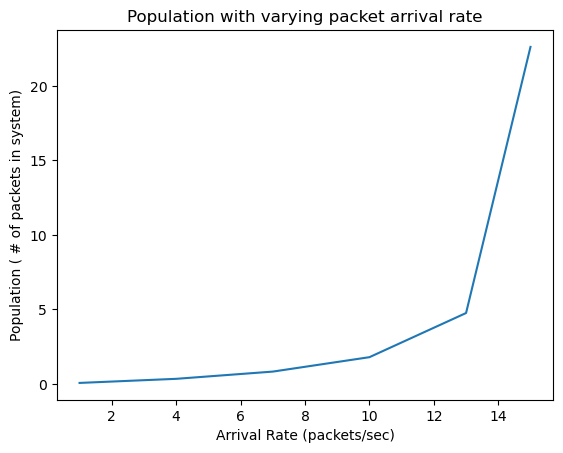

In [9]:
plt.plot(expirement2_df.index, expirement2_df['Population'])
plt.xlabel('Arrival Rate (packets/sec)')
plt.ylabel('Population ( # of packets in system)')
plt.title('Population with varying packet arrival rate')

plt.show()

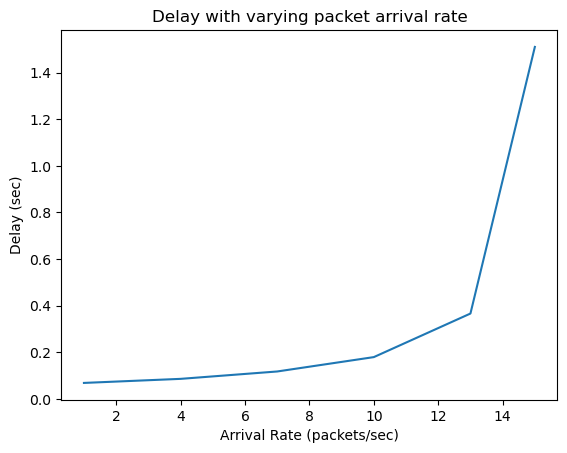

In [10]:
plt.plot(expirement2_df.index, expirement2_df['Average Packet Delay'])
plt.xlabel('Arrival Rate (packets/sec)')  
plt.ylabel('Delay (sec)')
plt.title('Delay with varying packet arrival rate')
plt.show()

In [26]:
max_rate = expirement2_df[expirement2_df['Average Packet Delay'] <= 0.4].index.max()
print(f"Max rate for delay <=400ms: {max_rate}")

Max rate for delay <=400ms: 13


In [27]:
expirement2_df

,Utilization,Average Packet Delay,Population,Packet Drop Rate
1,0.0631,0.068402,0.067144,0.0
4,0.2546,0.085835,0.342156,0.0
7,0.4517,0.117509,0.827338,0.0
10,0.6391,0.179185,1.794540,0.0
13,0.8337,0.366174,4.757165,0.0
15,0.9572,1.510356,22.611434,0.0


this conforms with the graph above

# Expirement 3:

In [29]:
# Experiment 3 parameters
cap = 100000
psize = 800 
qsize = 10000
times = 10000
arr_rates = [1, 4, 7, 10, 13, 15] 



!echo -------------------------Expirement3MD1------------------------- > tracefile
# Run M/D/1/K simulations    
md1t_delays = []
for rate in arr_rates:
    cmd = f'Qsim.exe {rate} p {cap} {psize*8} c {qsize} {times}' 
    subprocess.check_output(cmd, shell=True, text=True)
    
!echo -------------------------Expirement3DM1------------------------- >> tracefile
# Run D/M/1/K simulations
dm1t_delays = []
for rate in arr_rates:
    cmd = f'Qsim.exe {rate} c {cap} {psize*8} p {qsize} {times}'
    subprocess.check_output(cmd, shell=True, text=True)


!echo -------------------------Expirement3DD1------------------------- >> tracefile
mm1t_delays = []
for rate in arr_rates:
    cmd = f'Qsim.exe {rate} c {cap} {psize*8} c {qsize} {times}'
    subprocess.check_output(cmd, shell=True, text=True)


In [30]:
rename_file('Expirement3.txt', 'tracefile')

True

In [12]:
def expirement3():
    # Read the text file into a list of lines
    with open('Expirement3.txt', 'r') as file:
        lines = file.readlines()

    # Initialize empty lists for each experiment
    experiment3MD1_data = []
    experiment3DM1_data = []
    experiment3DD1_data = []

    # Define the current experiment variable to keep track of which experiment's data we are reading
    current_experiment = None

    # Loop through the lines in the file and extract data for each experiment
    for line in lines:
        line = line.strip()
        if line.startswith('-------------------------Expirement3'):
            current_experiment = line.split('-------------------------')[1]
            print("---")
        elif line.startswith('Utilization'):
            values = line.split(',')
            utilization = float(values[0].split(': ')[1])
            avg_packet_delay = float(values[1].split(': ')[1])
            num_packet_in_system = float(values[2].split(': ')[1])
            packet_drop_rate = float(values[3].split(': ')[1])
            
            data = {
                'Utilization': utilization,
                'Average Packet Delay': avg_packet_delay,
                '# of packet in system': num_packet_in_system,
                'Packet Drop Rate': packet_drop_rate
            }

            
            
            if current_experiment == 'Expirement3MD1':
                experiment3MD1_data.append(data)
            elif current_experiment == 'Expirement3DM1':
                experiment3DM1_data.append(data)
            elif current_experiment == 'Expirement3DD1':
                experiment3DD1_data.append(data)


    # Create dataframes for each experiment
    df_experiment3MD1 = pd.DataFrame(experiment3MD1_data)# columns=['Utilization', 'Average Packet Delay', '# of Packets in System', 'Packet Drop Rate'])
    df_experiment3DM1 = pd.DataFrame(experiment3DM1_data)# columns=['Utilization', 'Average Packet Delay', '# of Packets in System', 'Packet Drop Rate'])
    df_experiment3DD1 = pd.DataFrame(experiment3DD1_data)# columns=['Utilization', 'Average Packet Delay', '# of Packets in System', 'Packet Drop Rate'])

    # df_experiment3DD1.index = arr_rates
    # df_experiment3DM1.index = arr_rates
    # df_experiment3MD1.index = arr_rates
    




    

    return df_experiment3MD1, df_experiment3DM1, df_experiment3DD1


In [13]:
df_experiment3MD1, df_experiment3DM1, df_experiment3DD1 = expirement3()

---
---
---


In [14]:
df_experiment3MD1.index = arr_rates
df_experiment3MD1

,Utilization,Average Packet Delay,# of packet in system,Packet Drop Rate
1,0.0636,0.066139,0.065797,0.0
4,0.2568,0.074865,0.300377,0.0
7,0.4490,0.090124,0.632253,0.0
10,0.6389,0.120186,1.199723,0.0
13,0.8337,0.222177,2.894194,0.0
15,0.9586,0.835754,12.519106,0.0


In [15]:
df_experiment3DD1.index = arr_rates
df_experiment3DD1

,Utilization,Average Packet Delay,# of packet in system,Packet Drop Rate
1,0.064,0.064006,0.067990,0.0
4,0.256,0.064002,0.254080,0.0
7,0.448,0.064001,0.447991,0.0
10,0.640,0.064001,0.640000,0.0
13,0.832,0.064000,0.832109,0.0
15,0.960,0.064000,0.960000,0.0


In [16]:
df_experiment3DM1.index = arr_rates
df_experiment3DM1

,Utilization,Average Packet Delay,# of packet in system,Packet Drop Rate
1,0.0646,0.065158,0.068216,0.0
4,0.2542,0.065487,0.261066,0.0
7,0.4444,0.074849,0.526934,0.0
10,0.6376,0.104932,1.052316,0.0
13,0.8319,0.205241,2.665221,0.0
15,0.9594,0.928026,13.923629,0.0


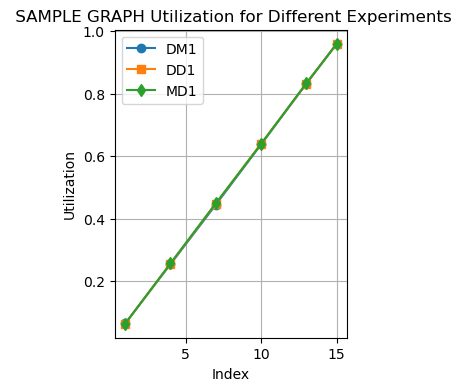

In [27]:
# Plot the data for MD1
plt.figure(figsize=(3,4))
plt.plot(df_experiment3DM1.index, df_experiment3DM1['Utilization'], label='DM1', marker='o')
# Plot the data for DM1
plt.plot(df_experiment3DD1.index, df_experiment3DD1['Utilization'], label='DD1', marker='s')
# Plot the data for DD1
plt.plot(df_experiment3MD1.index, df_experiment3MD1['Utilization'], label='MD1', marker='d')

plt.xlabel('Index')
plt.ylabel('Utilization')
plt.title(' SAMPLE GRAPH Utilization for Different Experiments')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

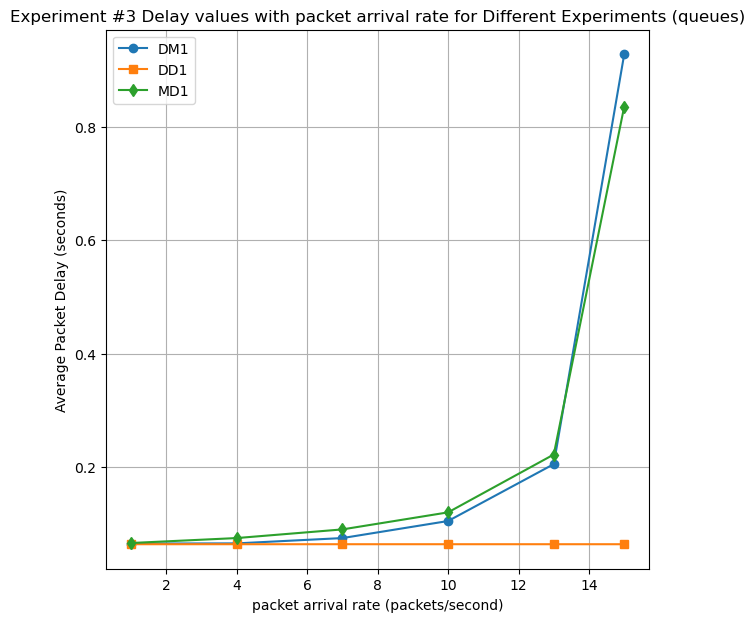

In [56]:
# Plot the data for Average Packet Delay
# set the size to 10x10x
# a) b) c)
plt.figure(figsize=(7,7))
plt.plot(df_experiment3DM1.index, df_experiment3DM1['Average Packet Delay'], label='DM1', marker='o')
plt.plot(df_experiment3DD1.index, df_experiment3DD1['Average Packet Delay'], label='DD1', marker='s')
plt.plot(df_experiment3MD1.index, df_experiment3MD1['Average Packet Delay'], label='MD1', marker='d')

plt.xlabel('packet arrival rate (packets/second)')
plt.ylabel('Average Packet Delay (seconds)')
plt.title('Experiment #3 Delay values with packet arrival rate for Different Experiments (queues)')
plt.legend()
plt.grid(True)
plt.show()


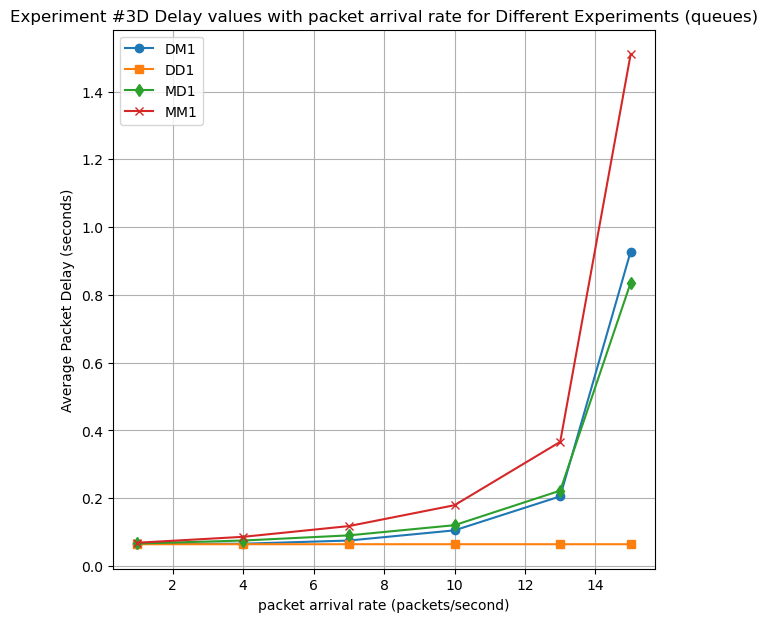

In [57]:

plt.figure(figsize=(7,7))
plt.plot(df_experiment3DM1.index, df_experiment3DM1['Average Packet Delay'], label='DM1', marker='o')
plt.plot(df_experiment3DD1.index, df_experiment3DD1['Average Packet Delay'], label='DD1', marker='s')
plt.plot(df_experiment3MD1.index, df_experiment3MD1['Average Packet Delay'], label='MD1', marker='d')
plt.plot(expirement2_df.index, expirement2_df['Average Packet Delay'], label='MM1', marker='x')


plt.xlabel('packet arrival rate (packets/second)')
plt.ylabel('Average Packet Delay (seconds)')
plt.title('Experiment #3D Delay values with packet arrival rate for Different Experiments (queues)')
plt.legend()
plt.grid(True)
plt.show()


## d) 
for MM1(inf) the dealt is consistantly higher than for the other queues.

- Experiment 2b is an M/M/1 queue with Poisson distributed arrival and exponential distributed service time.
- Experiment 3a is an M/D/1 queue with Poisson arrival but fixed (deterministic) service time.
- Experiment 3b is a D/M/1 queue with deterministic arrival but exponential service time.
- Experiment 3c is a D/D/1 queue with deterministic arrival and fixed service time.

The delays observed can be interpreted as:
- M/M/1 queue shows the highest delay as both arrival and service have variability.
- D/D/1 queue shows the lowest delay as both arrival and service are fixed/deterministic.
- M/D/1 and D/M/1 queues have delay in between above two as one is fixed while the other is stochastic.
As arrival rate increases, the delay increases for all queues due to increased load.

But the delay increase is lower for D/D/1 queue due to no variability.

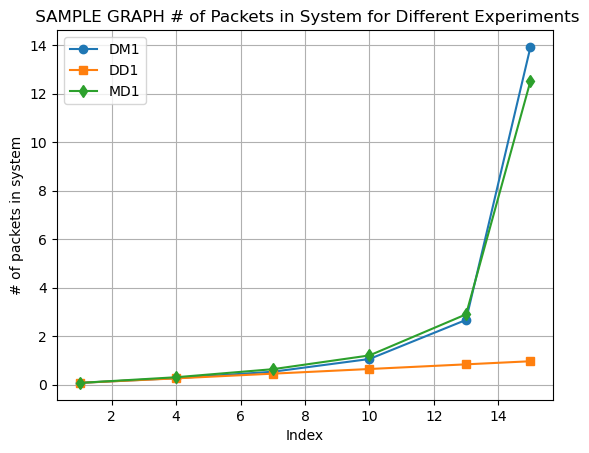

In [55]:
# Plot the data for # of packets in system

plt.plot(df_experiment3DM1.index, df_experiment3DM1['# of packet in system'], label='DM1', marker='o')
plt.plot(df_experiment3DD1.index, df_experiment3DD1['# of packet in system'], label='DD1', marker='s')
plt.plot(df_experiment3MD1.index, df_experiment3MD1['# of packet in system'], label='MD1', marker='d')



plt.xlabel('Index')
plt.ylabel('# of packets in system')
plt.title(' SAMPLE GRAPH # of Packets in System for Different Experiments')
plt.legend()
plt.grid(True)
plt.show()

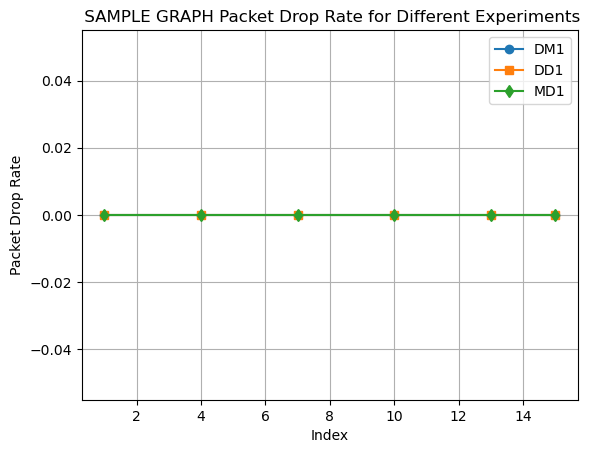

In [30]:
plt.plot(df_experiment3DM1.index, df_experiment3DM1['Packet Drop Rate'], label='DM1', marker='o')
plt.plot(df_experiment3DD1.index, df_experiment3DD1['Packet Drop Rate'], label='DD1', marker='s')
plt.plot(df_experiment3MD1.index, df_experiment3MD1['Packet Drop Rate'], label='MD1', marker='d')

plt.xlabel('Index')
plt.ylabel('Packet Drop Rate')
plt.title(' SAMPLE GRAPH Packet Drop Rate for Different Experiments')
plt.legend()
plt.grid(True)
plt.show()

# Expirement 4:

In [43]:
# Experiment 4 parameters
cap = 100000
psize = 800
times = 10000
arr_rates = [1, 4, 7, 10, 13, 16, 19, 22, 25]

In [109]:
rate = 10
for k in range(1, 11):
    cmd = f'Qsim.exe {rate} p {cap} {psize*8} p {k} {times}' 
    subprocess.check_output(cmd, shell=True, text=True)


In [111]:
rename_file('Expirement4ab.txt', 'tracefile')

True

In [31]:
def expirement4ab():
    data_list = []
    with open('Expirement4ab.txt', 'r') as file:
        lines = file.readlines()

    for line in lines:
        values = line.strip().split(',')
        utilization = float(values[0].split(': ')[1])
        avg_packet_delay = float(values[1].split(': ')[1])
        num_packet_in_system = float(values[2].split(': ')[1])
        packet_drop_rate = float(values[3].split(': ')[1])
        
        data_list.append([utilization, avg_packet_delay, num_packet_in_system, packet_drop_rate])


    df = pd.DataFrame(data_list, columns=['Utilization', 'Average Packet Delay', 'Population', 'Packet Drop Rate'])

    return df

In [32]:
df_4ab = expirement4ab()
df_4ab.index = list(range(1,11))
df_4ab

,Utilization,Average Packet Delay,Population,Packet Drop Rate
1,0.3918,0.063565,0.388349,0.3886
2,0.5107,0.089096,0.710924,0.2002
3,0.5686,0.108673,0.963885,0.1147
4,0.6001,0.127083,1.186162,0.0687
5,0.6147,0.139901,1.342918,0.0417
6,0.6234,0.148575,1.447395,0.0254
7,0.6320,0.156512,1.539174,0.0162
8,0.6283,0.163590,1.608917,0.0104
9,0.6375,0.166546,1.659693,0.0065
10,0.6423,0.173571,1.743642,0.0037


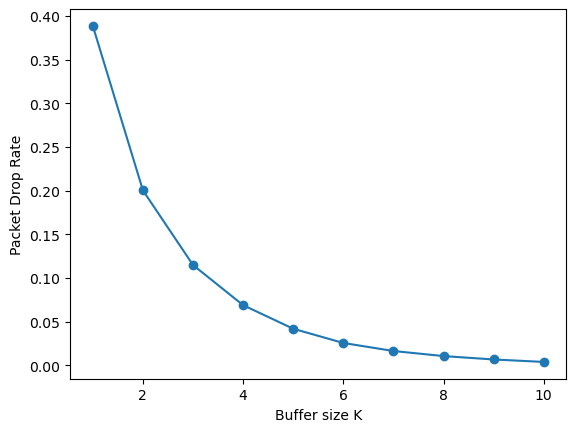

In [33]:
plt.plot(df_4ab.index, df_4ab["Packet Drop Rate"],  marker='o')
plt.xlabel('Buffer size K')
plt.ylabel('Packet Drop Rate')
plt.show()

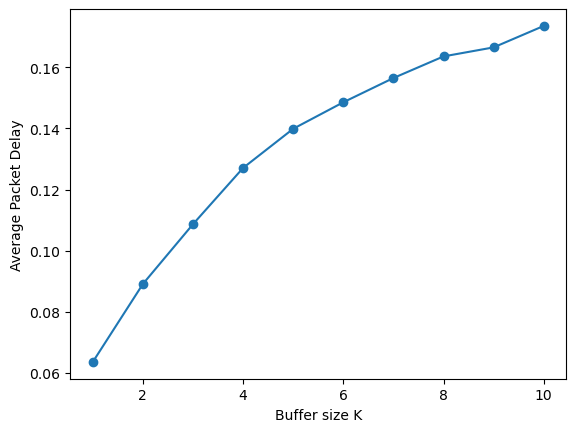

In [34]:
plt.plot(df_4ab.index, df_4ab["Average Packet Delay"],  marker='o')
plt.xlabel('Buffer size K')
plt.ylabel('Average Packet Delay')
plt.show()

In [35]:
k = 10
for rate in arr_rates:
    cmd = f'Qsim.exe {rate} p {cap} {psize*8} p {k} {times}' 
    subprocess.check_output(cmd, shell=True, text=True)

/bin/sh: Qsim.exe: command not found


CalledProcessError: Command 'Qsim.exe 1 p 100000 6400 p 10 10000' returned non-zero exit status 127.

In [113]:
rename_file('Expirement4cd.txt', 'tracefile')

True

In [44]:
def expirement4cd():
    data_list = []
    with open('Expirement4cd.txt', 'r') as file:
        lines = file.readlines()

    for line in lines:
        values = line.strip().split(',')
        utilization = float(values[0].split(': ')[1])
        avg_packet_delay = float(values[1].split(': ')[1])
        num_packet_in_system = float(values[2].split(': ')[1])
        packet_drop_rate = float(values[3].split(': ')[1])
        
        data_list.append([utilization, avg_packet_delay, num_packet_in_system, packet_drop_rate])


    df = pd.DataFrame(data_list, columns=['Utilization', 'Average Packet Delay', 'Population', 'Packet Drop Rate'])

    return df

In [48]:
df_4cd = expirement4cd()
df_4cd.index = arr_rates
df_4cd

,Utilization,Average Packet Delay,Population,Packet Drop Rate
1,0.0643,0.067699,0.068084,0.0000
4,0.2564,0.086797,0.348959,0.0000
7,0.4504,0.116291,0.820116,0.0003
10,0.6413,0.170468,1.701661,0.0042
13,0.8134,0.258823,3.277546,0.0292
16,0.9180,0.369453,5.290679,0.1054
19,0.9711,0.446764,6.785804,0.1987
22,0.9907,0.506113,7.820408,0.2972
25,0.9978,0.538688,8.387216,0.3761


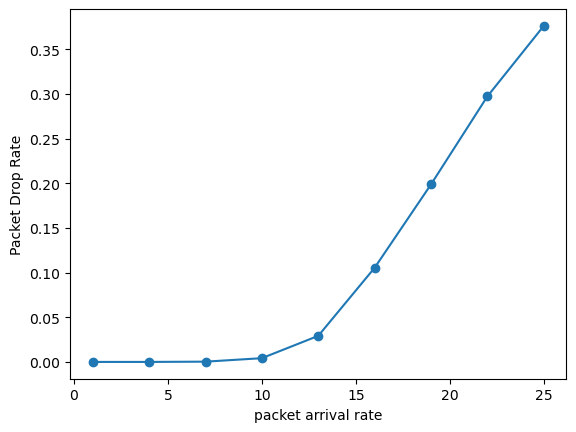

In [52]:
plt.plot(df_4cd.index, df_4cd["Packet Drop Rate"],  marker='o')
plt.xlabel('packet arrival rate')
plt.ylabel('Packet Drop Rate')
plt.show()

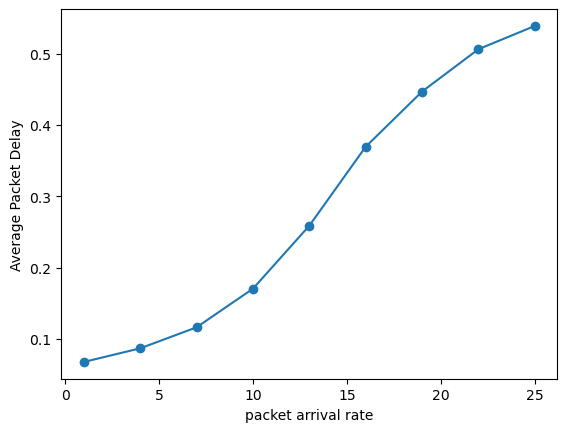

In [51]:
plt.plot(df_4cd.index, df_4cd["Average Packet Delay"],  marker='o')
plt.xlabel('packet arrival rate')
plt.ylabel('Average Packet Delay')
plt.show()